In [13]:

# heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from pathlib import Path

report_dir = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.08.01_CJ_paper_pdx_chordomacl'
basket_scores_path = Path(report_dir) / Path('basket_scores_4th_gen_zscored.tsv')
meta_data_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx'


In [14]:
cell_lines_ids = [
'CHDM-13425-306',
'CHDM-CH-22',
'CHDM-JHC-7',
'CHDM-MUG-CC1.1',
'CHDM-MUG-Chor1',
'CHDM-U-CH1',
'CHDM-U-CH12',
'CHDM-U-CH17PII',
'CHDM-U-CH2',
'CHDM-U-CHCF359B',
'CHDM-U-CHCF365',
'CHDM-UM-Chor1',
'CHDM-UM-Chor5C',
'CHDM-UM-Chor5D'
]

patient_ids = [
'P0361',
'P0364',
'P0425',
'P0451',
'P0454',
'P0537',
'P0582',
'P0583',
'P0621',
'P0622',
'P0623',
'P0624',
'P0625',
'P0626',
'P0627',
'P0628',
'P0631',
'P0633',
'P0634',
'P0635',
'P0636',
'P0638',
'P0641',
'P0642',
'P0643',
'P0644',
'P0645',
'P0647',
'P0648',
'P0651',
'P0653',
'P0654',
'P0655',
'P0656',
'P0657',
'P0682',
'P0685',
'P0731',
'P0751',
'P0753',
'P0891',
'P0901',
'P0937',
'P0996',
'P0997',
'P0998',
'P1003',
'P1006',
'P1008',
'P1016',
'P1017',
'P1018',
'P1021',
'P1022',
'P1023',
'P1028',
'P1037',
'P1038',
'P1055',
'P1056',
'P1057',
'P1058',
'P1065',
'P1066',
'P1067',
'P1068',
'P1078',
'P1087',
'P1088'
]

pdx_ids = [
'PDX-CF322-T1',
'PDX-CF359B-T1',
'PDX-CF365-T1',
'PDX-CF459-T1',
'PDX-CF466-T1',
'PDX-CF522-T1',
'PDX-CF538-T1',
'PDX-CF539-T1',
'PDX-CF539-T1-R2',
'PDX-CF555-T1',
'PDX-SF10792-T1',
'PDX-SF8894-T1'
]


# meta_data 

In [15]:

meta_data = pd.read_excel(meta_data_path)
meta =  meta_data[['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name')
sample_to_pseudo_dic = meta_data[['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name').to_dict()['Paper_pseudo_identifier']
pseudo_to_sample_dic = meta_data[['Sample name', 'Paper_pseudo_identifier']].set_index('Paper_pseudo_identifier').to_dict()['Sample name']
patient_sampledf = pd.DataFrame(patient_ids,columns=['psuedo'])
patient_sample_names = patient_sampledf.psuedo.map(pseudo_to_sample_dic).tolist()

# New TUPAC

In [16]:
new_signatures_path =  '/home/amir/Desktop/Annika_files/TUPAC_for_new_signatures.xlsx'
basekt_scores_df = pd.read_csv(basket_scores_path,sep='\t')
basket_names =['EGFR']
basekt_scores_df.set_index('Sample',inplace=True)

IFN_df = pd.read_excel(new_signatures_path)
final_IFN_df = IFN_df[['Sample name','z_scores_sum_LOO']].set_index("Sample name").T



def get_df_from_samplelist(patient_sample_names):
    sub_final_IFN_df = final_IFN_df[patient_sample_names]
    sub_final_IFN_df.index = ['IFN_TUPAC_score']
    sub_basekt_scores_df = basekt_scores_df.loc[patient_sample_names,basket_names].T
    sub_basekt_scores_df.index = sub_basekt_scores_df.index + '_TUPAC_score'
    final_df = pd.concat([sub_basekt_scores_df,sub_final_IFN_df],axis=0)
    temp = final_df.T
    temp = temp.sort_values('EGFR_TUPAC_score',ascending=False)
    return temp


# old TUPAC

In [17]:

df1 = get_df_from_samplelist(patient_sample_names)
df1.index = df1.index.map(sample_to_pseudo_dic)
df2 = get_df_from_samplelist(cell_lines_ids)
df3 = get_df_from_samplelist(pdx_ids)
#df.index = df.index.map(meta_dic)
min_df = pd.concat([df1,df2,df3]).min().min()
max_df = pd.concat([df1,df2,df3]).max().max()
#print(max_df)
#print(min_df)
#df = df.fillna(-4.2)

#plt.rcParams["figure.figsize"] = [20, 17]
#plt.rcParams["figure.autolayout"] = True


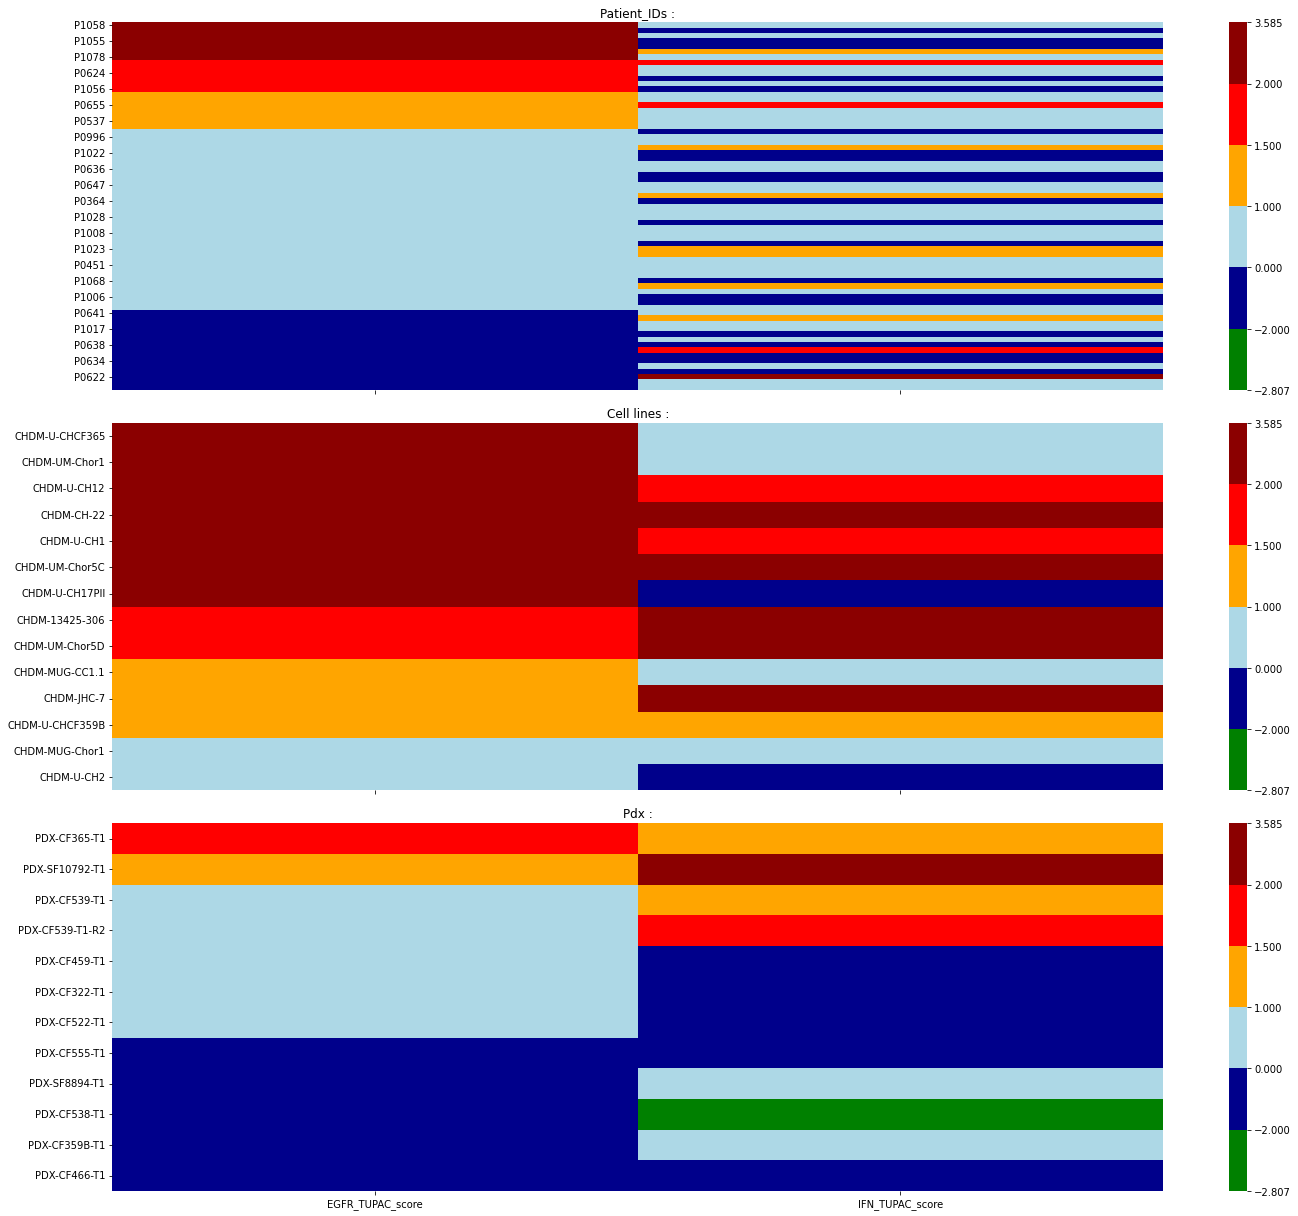

In [19]:
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams["figure.figsize"] = [20, 17]
plt.rcParams["figure.autolayout"] = True
fig, (patient, celllines,pdx) = plt.subplots(3, 1, sharex=True)
cmap = colors.ListedColormap(['green','darkblue','lightblue','orange','red','darkred'])
bounds = [min_df,-2,0,1,1.5,2,max_df]
norm = colors.BoundaryNorm(bounds,cmap.N)
# plot heatmap
im1 = sns.heatmap(df1,cmap=cmap,ax=patient,norm=norm)
#patient.set_yticklabels(ylabels)
patient.set_ylabel('')
patient.set_xlabel('')
patient.set_title('Patient_IDs :')

im2 =sns.heatmap(df2,cmap=cmap,ax=celllines,norm=norm)
celllines.set_ylabel('')
celllines.set_xlabel('')
celllines.set_title('Cell lines :');
fig.subplots_adjust(wspace=0.05, hspace=0)

im3 =sns.heatmap(df3,cmap=cmap,ax=pdx,norm=norm)
pdx.set_ylabel('')
pdx.set_xlabel('')
pdx.set_title('Pdx :');
fig.subplots_adjust(wspace=0.05, hspace=0)

mappable = im1.get_children()[0]
#fig.colorbar(mappable, ax = [patient,celllines],orientation = 'vertical')
#ps_names.to_excel('/home/amir/Desktop/Annika_files/pseudo_names.xlsx')
plt.savefig('/home/amir/Desktop/Annika_files/TUPAC_IFN_EGFR.svg')
plt.show()